# ST5027 Assignment 1


## Part 1 a   
Generation of binary data.    
The data is generated and stored with the “Generate_data.py” file.   
Run the 'Generate_data.py" script. 

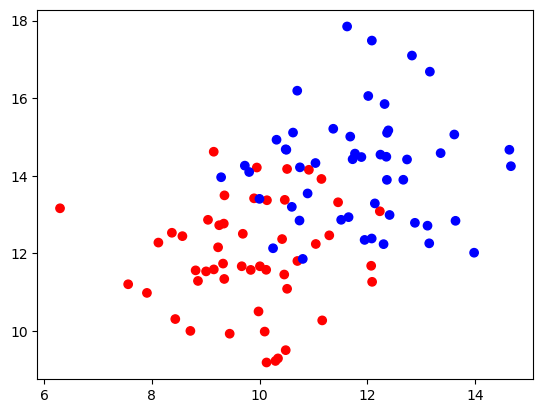

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io

N1 = 50
N2 = 50
K = 2
sigma = 2

# Set numpy random seed
np.random.seed(42)

mean1 = (10, 12)
cov1 = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean1, cov1, N1)
c1 = ['red'] * len(X1)

mean2 = (12, 14)
cov2 = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean2, cov2, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = []
for n in range(0, len(X)):
    if (n < len(X1)):
        T.append(0)
    else:
        T.append(1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color)
plt.show()

np.save('class1.npy', X1)
np.save('class2.npy', X2)
io.savemat('class1.mat', {'class1': X1})
io.savemat('class2.mat', {'class2': X2})

## Part 1 b
Implement a multi-layer perceptron (MLP) for classification.    
The MLP is a 2 layer MLP with only ONE hidden layer.    
Its structure should be 2 input neurons, 3 hidden layer neurons, and 1 output neuron (binary output).    
You may select the activation function for all the neurons (e.g., ReLU activation).    
Show your detailed implementation of the MLP.     
There are a total of 9 connections between the neurons.    
Initialize their weights randomly (e.g., follow a normal distribution), then plot the decision boundary of the initial MLP. 

In [21]:
# Define the ReLu activation function
def relu(x):
    return np.maximum(0, x)

In [22]:
# Define the derivative of the ReLU activation function
def relu_derivative(x):
    '''
    Although the derivative of ReLU is not defined at x = 0 mathematically,
    we choose set the derivative to be 0 at x = 0
    ''' 
    return np.where(x > 0, 1, 0)

The sigmoid activation function:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
This is chosen as the function gives binary output.   
The derivative of this function with respect to x is given by:   
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

In [23]:
# For binary classification output, we use the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
# Define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
        return sigmoid(x) * (1 - sigmoid(x))

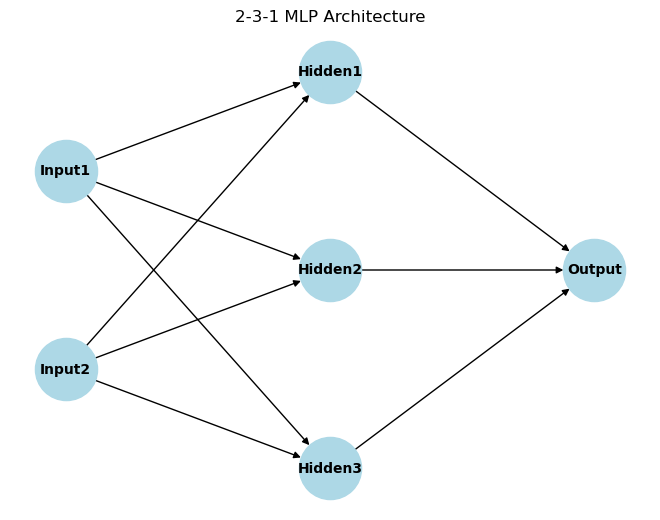

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_mlp():
    G = nx.DiGraph()
    
    # Adding input, hidden, and output nodes
    input_nodes = ['Input1', 'Input2']
    hidden_nodes = ['Hidden1', 'Hidden2', 'Hidden3']
    output_node = ['Output']

    # Adding edges between input and hidden layer
    for input_node in input_nodes:
        for hidden_node in hidden_nodes:
            G.add_edge(input_node, hidden_node)
    
    # Adding edges between hidden and output layer
    for hidden_node in hidden_nodes:
        G.add_edge(hidden_node, output_node[0])
    
    # Node positions for better visualization
    pos = {
        'Input1': (-2, 0.5), 'Input2': (-2, -0.5),
        'Hidden1': (0, 1), 'Hidden2': (0, 0), 'Hidden3': (0, -1),
        'Output': (2, 0)
    }
    
    # Drawing the network
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('2-3-1 MLP Architecture')
    plt.show()

visualize_mlp()

The required network is a MLP with TWO layers.  
The weights $w$ will be a 3 by 2 matrix.  
The biases will be initialised at 0.   

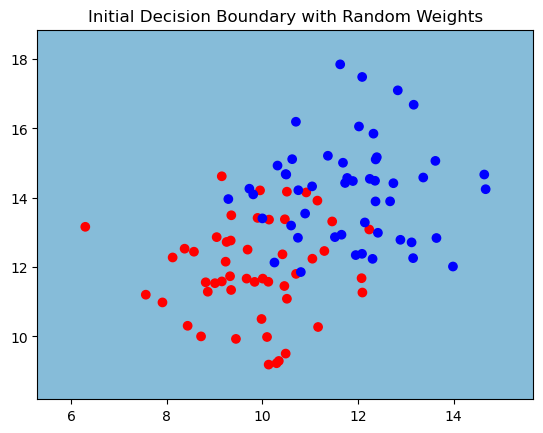

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize the MLP with random weights and biases
np.random.seed(42)  # for reproducibility
input_size = 2  # 2 input neurons
hidden_size = 3  # 3 hidden neurons
output_size = 1  # 1 output neuron

# Randomly initialize weights from a normal distribution
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))  # biases for hidden layer

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))  # biases for output layer

# Feedforward function
def feedforward(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # binary classification output
    
    return A2

# Load the data
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')
X = np.concatenate((X1, X2))

# Visualize the initial decision boundary with random weights
def plot_decision_boundary(X):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions
    preds = feedforward(grid)
    preds = preds.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.8)
    
    # Plot original data
    plt.scatter(X[:, 0], X[:, 1], c=['red']*50 + ['blue']*50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Initial Decision Boundary with Random Weights')
    plt.show()

# Plot the decision boundary with the initialized MLP
plot_decision_boundary(X)


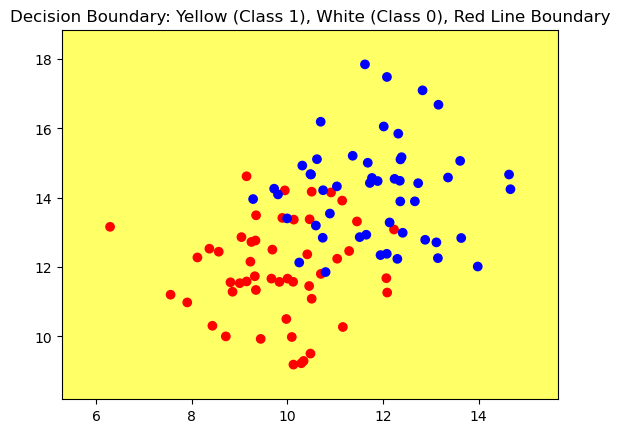

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions (same as before)
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the MLP with random weights and biases (same as before)
np.random.seed(42)
input_size = 2
hidden_size = 3
output_size = 1

# Randomly initialize weights from a normal distribution
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))  # biases for hidden layer

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))  # biases for output layer

# Feedforward function (same as before)
def feedforward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A2

# Load the data (same as before)
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')
X = np.concatenate((X1, X2))

# New visualization of the decision boundary with yellow for class 1, white for class 0, and red boundary
def plot_decision_boundary(X):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions
    preds = feedforward(grid)
    preds = preds.reshape(xx.shape)
    
    # Plot decision regions: yellow for class 1, white for class 0
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=['white', 'yellow'], alpha=0.6)
    
    # Plot the decision boundary (where prediction changes from 0 to 1)
    plt.contour(xx, yy, preds, levels=[0.5], colors='red', linewidths=2)
    
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=['red']*50 + ['blue']*50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Decision Boundary: Yellow (Class 1), White (Class 0), Red Line Boundary')
    plt.show()

# Plot the decision boundary with the updated visualization
plot_decision_boundary(X)


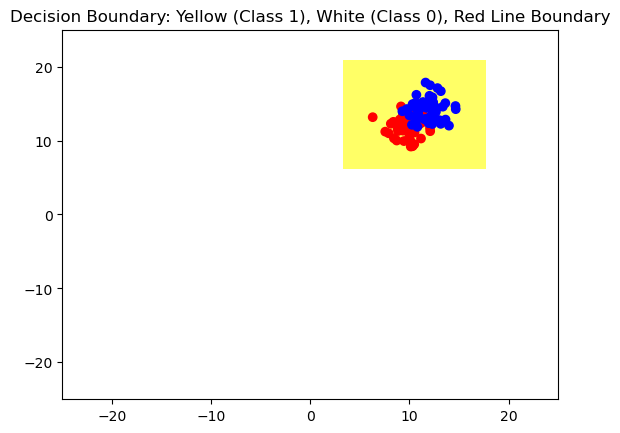

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions (same as before)
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the MLP with random weights and biases (same as before)
np.random.seed(42)
input_size = 2
hidden_size = 3
output_size = 1

# Randomly initialize weights from a normal distribution
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))  # biases for hidden layer

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))  # biases for output layer

# Feedforward function (same as before)
def feedforward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A2

# Load the data (same as before)
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')
X = np.concatenate((X1, X2))

# New visualization of the decision boundary with yellow for class 1, white for class 0, and red boundary
def plot_decision_boundary(X):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3  # Increase range on x-axis
    y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3  # Increase range on y-axis
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions
    preds = feedforward(grid)
    preds = preds.reshape(xx.shape)
    
    # Plot decision regions: yellow for class 1, white for class 0
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=['white', 'yellow'], alpha=0.6)
    
    # Plot the decision boundary (where prediction changes from 0 to 1)
    plt.contour(xx, yy, preds, levels=[0.5], colors='red', linewidths=2)
    
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=['red']*50 + ['blue']*50)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title('Decision Boundary: Yellow (Class 1), White (Class 0), Red Line Boundary')
    plt.show()

# Plot the decision boundary with the updated visualization
plot_decision_boundary(X)


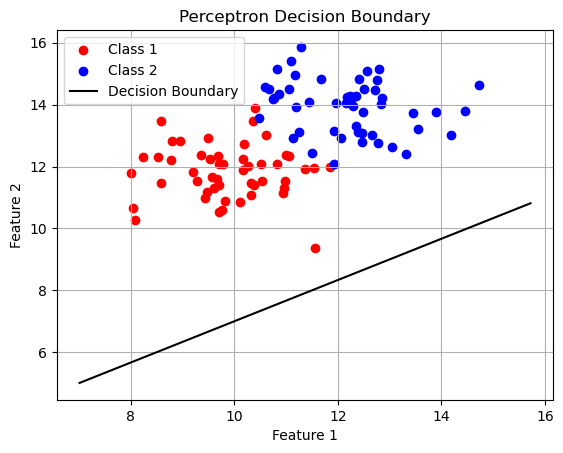

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assume weights and bias learned from the model
w = np.array([2, -3])  # Example weights (w1, w2)
b = 1  # Example bias

# Generate sample data (e.g., class 1 and class 2)
X1 = np.random.multivariate_normal([10, 12], [[1, 0], [0, 1]], 50)
X2 = np.random.multivariate_normal([12, 14], [[1, 0], [0, 1]], 50)

X = np.vstack((X1, X2))

# Plot the data points
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')

# Plot decision boundary
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # Derived from w1*x1 + w2*x2 + b = 0
plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.grid(True)
plt.show()


In [10]:
# Function to initialize weights and biases with normal distribution
def initialize_weights():
    W1 = np.random.randn(3, 2)  # Weights for input to hidden layer (3 neurons, 2 inputs)
    b1 = np.random.randn(3, 1)  # Biases for hidden layer (3 neurons)
    W2 = np.random.randn(1, 3)  # Weights for hidden to output layer (1 output, 3 hidden neurons)
    b2 = np.random.randn(1, 1)  # Bias for output layer (1 neuron)
    return W1, b1, W2, b2

In [11]:
# Forward pass through the MLP
def forward_pass(X, W1, b1, W2, b2):
    # Hidden layer activation
    Z1 = np.dot(W1, X.T) + b1  # Linear combination (Wx + b)
    A1 = relu(Z1)              # ReLU activation function
    
    # Output layer activation
    Z2 = np.dot(W2, A1) + b2   # Linear combination (Wx + b)
    A2 = sigmoid(Z2)           # Sigmoid activation for binary output
    return A1, A2

In [12]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, A2 = forward_pass(grid, W1, b1, W2, b2)
    Z = A2.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Decision Boundary of Randomly Initialized MLP")
    plt.show()

In [13]:
# Initialize the weights and biases
W1, b1, W2, b2 = initialize_weights()

In [14]:
# Loading the class data from the .npy files
class1 = np.load('class1.npy')  # Coordinates for class 1
class2 = np.load('class2.npy')  # Coordinates for class 2

In [15]:
# Label the data
y_class1 = np.zeros((class1.shape[0],))  # Label for class 1 points is 0
y_class2 = np.ones((class2.shape[0],))   # Label for class 2 points is 1

In [16]:
# Stack the 2 classes together
X = np.vstack((class1, class2))  # Stack class 1 and class 2 points vertically
y = np.hstack((y_class1, y_class2))  # Combine the labels

In [17]:
# Perform a forward pass using the initialized weights and biases
A1, A2 = forward_pass(X, W1, b1, W2, b2)

In [18]:
# Since A2 is a probability (from sigmoid), we can threshold at 0.5 to get the binary predictions
predictions = (A2 > 0.5).astype(int)

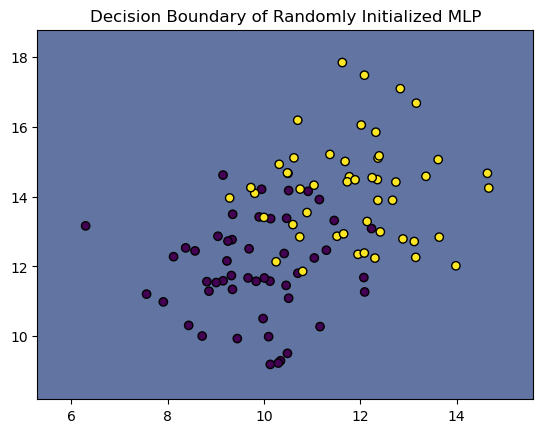

In [19]:
# Plot the decision boundary with the random weights
plot_decision_boundary(X, y, W1, b1, W2, b2)